In [3]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
data_path = "/content/drive/MyDrive/PlantVillage"




In [5]:
import os
os.listdir(data_path)



['Tomato_Late_blight',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Bacterial_spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato_healthy',
 'Tomato_Early_blight',
 'Potato___healthy',
 'Pepper__bell___Bacterial_spot',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Pepper__bell___healthy']

In [6]:
import os
import random
import shutil

BASE_DIR = "/content/drive/MyDrive/PlantVillage"

print(os.listdir(BASE_DIR))



['Tomato_Late_blight', 'Tomato_Septoria_leaf_spot', 'Tomato_Leaf_Mold', 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato_healthy', 'Tomato_Early_blight', 'Potato___healthy', 'Pepper__bell___Bacterial_spot', 'Potato___Early_blight', 'Potato___Late_blight', 'Pepper__bell___healthy']


In [7]:
SPLIT_DIR = "/content/drive/MyDrive/PlantVillage_Split"

TRAIN_DIR = os.path.join(SPLIT_DIR, "train")
VAL_DIR   = os.path.join(SPLIT_DIR, "val")
TEST_DIR  = os.path.join(SPLIT_DIR, "test")

for folder in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    os.makedirs(folder, exist_ok=True)


In [8]:
train_ratio = 0.7
val_ratio   = 0.15
test_ratio  = 0.15

classes = os.listdir(BASE_DIR)

for cls in classes:
    cls_path = os.path.join(BASE_DIR, cls)

    if not os.path.isdir(cls_path):
        continue

    images = os.listdir(cls_path)
    random.shuffle(images)

    total = len(images)
    train_end = int(total * train_ratio)
    val_end   = train_end + int(total * val_ratio)

    train_imgs = images[:train_end]
    val_imgs   = images[train_end:val_end]
    test_imgs  = images[val_end:]

    for split, split_imgs in zip(
        [TRAIN_DIR, VAL_DIR, TEST_DIR],
        [train_imgs, val_imgs, test_imgs]
    ):
        split_cls_dir = os.path.join(split, cls)
        os.makedirs(split_cls_dir, exist_ok=True)

        for img in split_imgs:
            src = os.path.join(cls_path, img)
            dst = os.path.join(split_cls_dir, img)
            shutil.copy(src, dst)

print("✅ Dataset successfully split!")



✅ Dataset successfully split!


In [9]:
print("Train classes:", os.listdir(TRAIN_DIR))
print("Val classes:", os.listdir(VAL_DIR))
print("Test classes:", os.listdir(TEST_DIR))


Train classes: ['Tomato_Late_blight', 'Tomato_Septoria_leaf_spot', 'Tomato_Leaf_Mold', 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato_healthy', 'Tomato_Early_blight', 'Potato___healthy', 'Pepper__bell___Bacterial_spot', 'Potato___Early_blight', 'Potato___Late_blight', 'Pepper__bell___healthy']
Val classes: ['Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato_Septoria_leaf_spot', 'Tomato_Leaf_Mold', 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Target_Spot', 'Tomato_healthy', 'Tomato_Early_blight', 'Potato___healthy', 'Pepper__bell___Bacterial_spot', 'Potato___Early_blight', 'Potato___Late_blight', 'Pepper__bell___healthy']
Test classes: ['Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato_Septoria_leaf_spot', 'Tomato_Leaf_Mold', 'Tomato__Tomato_mosaic_

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint



In [11]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

val_test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_gen = val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_gen.num_classes
print("Classes:", train_gen.class_indices)



Found 16964 images belonging to 15 classes.
Found 4598 images belonging to 15 classes.
Found 4530 images belonging to 15 classes.
Classes: {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}


In [12]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)

class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: np.float64(1.622572931611669), 1: np.float64(1.093745970341715), 2: np.float64(1.6156190476190475), 3: np.float64(1.6156190476190475), 4: np.float64(10.669182389937108), 5: np.float64(0.5856723631969618), 6: np.float64(1.6156190476190475), 7: np.float64(0.6514592933947773), 8: np.float64(1.3044213763936947), 9: np.float64(0.7037544077992118), 10: np.float64(0.7338957386978153), 11: np.float64(1.151663272233537), 12: np.float64(0.38823664034786587), 13: np.float64(3.355885262116716), 14: np.float64(1.0161126085654388)}


In [13]:
base_model = EfficientNetB3(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)

x = Dense(512, activation="relu")(x)
x = Dropout(0.4)(x)

outputs = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)
model.summary()



43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        960 │ block1a_se_excit

 Total params: 12,889,918 (49.17 MB)

 Trainable params: 2,106,383 (8.04 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks,
    class_weight=class_weights
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4940 - loss: 1.5837

531/531 ━━━━━━━━━━━━━━━━━━━━ 1424s 3s/step - accuracy: 0.4943 - loss: 1.5829 - val_accuracy: 0.7549 - val_loss: 0.7057 - learning_rate: 0.0010
Epoch 2/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.7327 - loss: 0.7699

531/531 ━━━━━━━━━━━━━━━━━━━━ 315s 595ms/step - accuracy: 0.7327 - loss: 0.7699 - val_accuracy: 0.8510 - val_loss: 0.4648 - learning_rate: 0.0010
Epoch 3/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.7738 - loss: 0.6782

531/531 ━━━━━━━━━━━━━━━━━━━━ 318s 599ms/step - accuracy: 0.7738 - loss: 0.6782 - val_accuracy: 0.8686 - val_loss: 0.4022 - learning_rate: 0.0010
Epoch 4/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 314s 590ms/step - accuracy: 0.7861 - loss: 0.6306 - val_accuracy: 0.8445 - val_loss: 0.4662 - learning_rate: 0.0010
Epoch 5/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 310s 585ms/step - accuracy: 0.7986 - loss: 0.5934 - val_accuracy: 0.8151 - val_loss: 0.5144 - learning_rate: 0.0010
Epoch 6/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 309s 582ms/step - accuracy: 0.8083 - loss: 0.6129 - val_accuracy: 0.8241 - val_loss: 0.5157 - learning_rate: 0.0010
Epoch 7/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.8331 - loss: 0.4960

531/531 ━━━━━━━━━━━━━━━━━━━━ 315s 593ms/step - accuracy: 0.8331 - loss: 0.4959 - val_accuracy: 0.8921 - val_loss: 0.3295 - learning_rate: 3.0000e-04
Epoch 8/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.8593 - loss: 0.4152

531/531 ━━━━━━━━━━━━━━━━━━━━ 320s 603ms/step - accuracy: 0.8593 - loss: 0.4152 - val_accuracy: 0.9056 - val_loss: 0.2959 - learning_rate: 3.0000e-04
Epoch 9/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 321s 604ms/step - accuracy: 0.8651 - loss: 0.3979 - val_accuracy: 0.8952 - val_loss: 0.3303 - learning_rate: 3.0000e-04
Epoch 10/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 322s 605ms/step - accuracy: 0.8646 - loss: 0.3756 - val_accuracy: 0.8954 - val_loss: 0.3133 - learning_rate: 3.0000e-04
Epoch 11/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.8684 - loss: 0.3798

531/531 ━━━━━━━━━━━━━━━━━━━━ 323s 608ms/step - accuracy: 0.8684 - loss: 0.3798 - val_accuracy: 0.9165 - val_loss: 0.2737 - learning_rate: 3.0000e-04
Epoch 12/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 324s 610ms/step - accuracy: 0.8759 - loss: 0.3650 - val_accuracy: 0.9041 - val_loss: 0.2985 - learning_rate: 3.0000e-04
Epoch 13/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 323s 608ms/step - accuracy: 0.8838 - loss: 0.3425 - val_accuracy: 0.9000 - val_loss: 0.3166 - learning_rate: 3.0000e-04
Epoch 14/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 323s 609ms/step - accuracy: 0.8806 - loss: 0.3538 - val_accuracy: 0.9110 - val_loss: 0.2768 - learning_rate: 3.0000e-04
Epoch 15/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.8869 - loss: 0.3175

531/531 ━━━━━━━━━━━━━━━━━━━━ 322s 607ms/step - accuracy: 0.8869 - loss: 0.3175 - val_accuracy: 0.9193 - val_loss: 0.2593 - learning_rate: 9.0000e-05
Epoch 16/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 326s 613ms/step - accuracy: 0.8887 - loss: 0.3184 - val_accuracy: 0.9158 - val_loss: 0.2649 - learning_rate: 9.0000e-05
Epoch 17/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9002 - loss: 0.2903

531/531 ━━━━━━━━━━━━━━━━━━━━ 330s 622ms/step - accuracy: 0.9002 - loss: 0.2903 - val_accuracy: 0.9211 - val_loss: 0.2485 - learning_rate: 9.0000e-05
Epoch 18/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.8989 - loss: 0.2925

531/531 ━━━━━━━━━━━━━━━━━━━━ 333s 627ms/step - accuracy: 0.8989 - loss: 0.2925 - val_accuracy: 0.9215 - val_loss: 0.2469 - learning_rate: 9.0000e-05
Epoch 19/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.9002 - loss: 0.2847

531/531 ━━━━━━━━━━━━━━━━━━━━ 327s 617ms/step - accuracy: 0.9002 - loss: 0.2846 - val_accuracy: 0.9239 - val_loss: 0.2381 - learning_rate: 9.0000e-05
Epoch 20/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9012 - loss: 0.2871

531/531 ━━━━━━━━━━━━━━━━━━━━ 330s 622ms/step - accuracy: 0.9012 - loss: 0.2870 - val_accuracy: 0.9271 - val_loss: 0.2318 - learning_rate: 9.0000e-05


In [15]:
for layer in base_model.layers[-80:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

fine_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=callbacks,
    class_weight=class_weights
)



Epoch 1/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 444s 727ms/step - accuracy: 0.7007 - loss: 1.5530 - val_accuracy: 0.8210 - val_loss: 0.6120 - learning_rate: 1.0000e-05
Epoch 2/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 337s 634ms/step - accuracy: 0.7884 - loss: 0.7078 - val_accuracy: 0.8480 - val_loss: 0.4944 - learning_rate: 1.0000e-05
Epoch 3/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 338s 636ms/step - accuracy: 0.8205 - loss: 0.5838 - val_accuracy: 0.8691 - val_loss: 0.4203 - learning_rate: 1.0000e-05
Epoch 4/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 337s 635ms/step - accuracy: 0.8366 - loss: 0.4877 - val_accuracy: 0.8882 - val_loss: 0.3537 - learning_rate: 1.0000e-05
Epoch 5/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 334s 628ms/step - accuracy: 0.8599 - loss: 0.4123 - val_accuracy: 0.8976 - val_loss: 0.3167 - learning_rate: 1.0000e-05
Epoch 6/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 338s 637ms/step - accuracy: 0.8673 - loss: 0.3986 - val_accuracy: 0.9097 - val_loss: 0.2816 - learning_rate: 1.0000e-05
Epoch 7/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 

531/531 ━━━━━━━━━━━━━━━━━━━━ 335s 631ms/step - accuracy: 0.8906 - loss: 0.3124 - val_accuracy: 0.9274 - val_loss: 0.2174 - learning_rate: 1.0000e-05
Epoch 10/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.9048 - loss: 0.2834

531/531 ━━━━━━━━━━━━━━━━━━━━ 320s 603ms/step - accuracy: 0.9048 - loss: 0.2834 - val_accuracy: 0.9332 - val_loss: 0.2013 - learning_rate: 1.0000e-05
Epoch 11/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.9030 - loss: 0.2651

531/531 ━━━━━━━━━━━━━━━━━━━━ 323s 608ms/step - accuracy: 0.9030 - loss: 0.2651 - val_accuracy: 0.9369 - val_loss: 0.1906 - learning_rate: 1.0000e-05
Epoch 12/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.9133 - loss: 0.2592

531/531 ━━━━━━━━━━━━━━━━━━━━ 334s 628ms/step - accuracy: 0.9133 - loss: 0.2592 - val_accuracy: 0.9389 - val_loss: 0.1853 - learning_rate: 1.0000e-05
Epoch 13/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.9160 - loss: 0.2226

531/531 ━━━━━━━━━━━━━━━━━━━━ 332s 625ms/step - accuracy: 0.9160 - loss: 0.2226 - val_accuracy: 0.9474 - val_loss: 0.1577 - learning_rate: 1.0000e-05
Epoch 14/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.9224 - loss: 0.2170

531/531 ━━━━━━━━━━━━━━━━━━━━ 333s 626ms/step - accuracy: 0.9224 - loss: 0.2170 - val_accuracy: 0.9528 - val_loss: 0.1422 - learning_rate: 1.0000e-05
Epoch 15/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.9287 - loss: 0.2093

531/531 ━━━━━━━━━━━━━━━━━━━━ 384s 629ms/step - accuracy: 0.9287 - loss: 0.2093 - val_accuracy: 0.9530 - val_loss: 0.1392 - learning_rate: 1.0000e-05


In [16]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Final Test Accuracy: {test_acc:.4f}")


142/142 ━━━━━━━━━━━━━━━━━━━━ 393s 3s/step - accuracy: 0.9688 - loss: 0.0972
✅ Final Test Accuracy: 0.9572


In [17]:
from tensorflow.keras.preprocessing import image

def predict_disease(img_path, threshold=0.6):
    img = image.load_img(img_path, target_size=(224,224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)

    preds = model.predict(img)[0]
    idx = np.argmax(preds)
    confidence = preds[idx]

    labels = list(train_gen.class_indices.keys())

    if confidence < threshold:
        return "Uncertain prediction", confidence

    return labels[idx], confidence


Saving potatotest1.jpg to potatotest1 (1).jpg


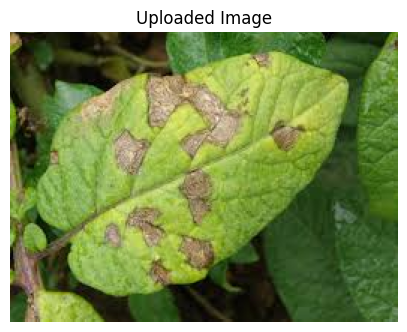

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: Potato___Early_blight
Confidence: 1.00


In [19]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

img = Image.open(img_path)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis("off")
plt.title("Uploaded Image")
plt.show()

label, confidence = predict_disease(img_path)
print(f"Prediction: {label}")
print(f"Confidence: {confidence:.2f}")



Saving test2.jpg to test2.jpg


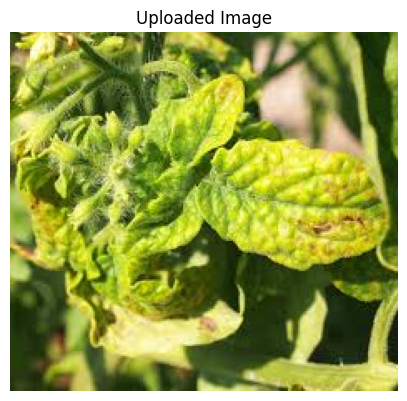

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: Tomato__Tomato_YellowLeaf__Curl_Virus
Confidence: 1.00


In [20]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Display image
img = Image.open(img_path)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis("off")
plt.title("Uploaded Image")
plt.show()

# Predict
label, confidence = predict_disease(img_path)
print(f"Prediction: {label}")
print(f"Confidence: {confidence:.2f}")


Saving tomtolateblight.jpg to tomtolateblight.jpg


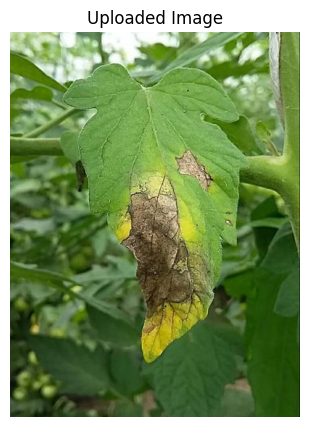

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: Tomato_Early_blight
Confidence: 0.90


In [21]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

img = Image.open(img_path)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis("off")
plt.title("Uploaded Image")
plt.show()

label, confidence = predict_disease(img_path)
print(f"Prediction: {label}")
print(f"Confidence: {confidence:.2f}")
